<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Постановка-задачи:" data-toc-modified-id="Постановка-задачи:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Постановка задачи:</a></span><ul class="toc-item"><li><span><a href="#Анализировать-покупки-и-предлагать-товары,-которые-могут-заинтересовать-покупателей-этой-возрастной-группы;" data-toc-modified-id="Анализировать-покупки-и-предлагать-товары,-которые-могут-заинтересовать-покупателей-этой-возрастной-группы;-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;</a></span></li><li><span><a href="#Контролировать-добросовестность-кассиров-при-продаже-алкоголя." data-toc-modified-id="Контролировать-добросовестность-кассиров-при-продаже-алкоголя.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Контролировать добросовестность кассиров при продаже алкоголя.</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение модели</a></span></li><li><span><a href="#Анализ-обученной-модели" data-toc-modified-id="Анализ-обученной-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ обученной модели</a></span></li></ul></div>

# Определение возраста покупателей

## Постановка задачи:
Сетевой супермаркет «Хлеб-Соль» внедряет систему компьютерного зрения для обработки фотографий покупателей. Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:
### Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;
### Контролировать добросовестность кассиров при продаже алкоголя.
Постройте модель, которая по фотографии определит приблизительный возраст человека. В вашем распоряжении набор фотографий людей с указанием возраста.

## Исследовательский анализ данных

In [1]:
# импортируем все необходимые библиотеки
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# создадим датафрейм и генератор изображений, загрузим изображения
df = pd.read_csv('/datasets/faces/labels.csv')
train_datagen = ImageDataGenerator(rescale=1/255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=df,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345) 

Found 7591 validated image filenames.


In [3]:
#посмотрим на размеры датафрейма
df.shape

(7591, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


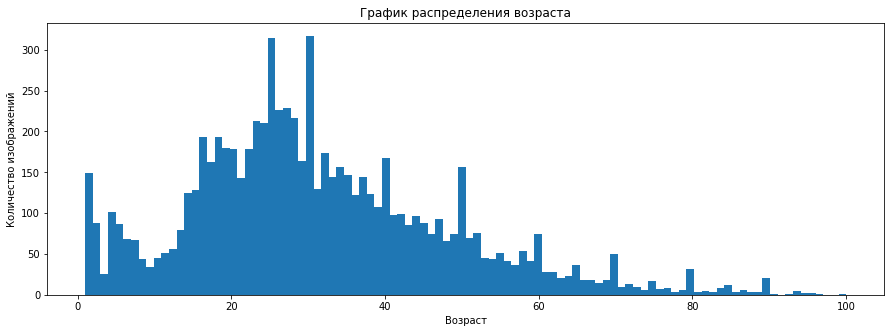

In [14]:
#Изучим распределение возрастов в наборе данных.
plt.figure(figsize=(15, 5))
plt.hist(df['real_age'], bins=100)
ax = plt.gca()
ax.set_xlabel("Возраст")
ax.set_ylabel("Количество изображений")
ax.set_title("График распределения возраста")
plt.show()

In [12]:
df['real_age'].describe()

count    7591.000000
mean       31.201159
std        17.145060
min         1.000000
25%        20.000000
50%        29.000000
75%        41.000000
max       100.000000
Name: real_age, dtype: float64

In [13]:
#Посмотрим на топ-10 наиболее представленных в датасете возрастов.
df.groupby('real_age').count().reset_index().sort_values(by='file_name', ascending=False).head(10)

,real_age,file_name
29,30,317
24,25,315
26,27,229
25,26,226
27,28,217
22,23,213
23,24,211
15,16,193
17,18,193
18,19,180


В основном возраст от 20 до 30 лет.

Средний возраст по выборке равен 31 году, медианное значение - 29 лет.

Посмотрим 12 случайных фотографий из нашего датасета.

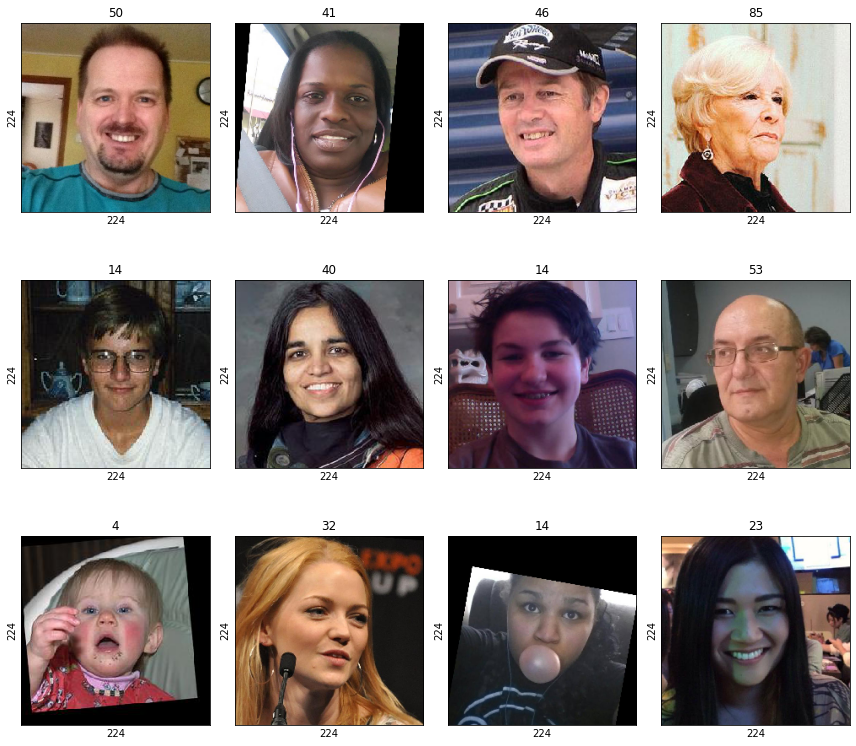

In [8]:
features, target = next(train_gen_flow)

fig = plt.figure(figsize=(12,12))
for i in range(12):
    fig.add_subplot(3, 4, i+1)
    plt.imshow(features[i])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    plt.title(str(target[i]))
    plt.xlabel(features[i].shape[0])
    plt.ylabel(features[i].shape[1])

Размеры фотографий одинаковые. Есть фото со скошенными рамками. Фотографии сделаны при разных условиях освещенности и на разную технику. При обучении модели сразу добавим аугментацию отражения по горизонтали (это сохранит ключевые признаки и вдвое увеличит количество изображений, на которых будет обучаться модель). Если показатель MAE будет недостаточно высоким, рассмотрим добавление шума к изображениям и небольшого сдвига. Ориентация лиц нормальная.

## Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

```python
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Conv2D, Flatten, AvgPool2D, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50 


def load_train(path):
    df = pd.read_csv(path+'labels.csv')                                                     
    train_datagen = ImageDataGenerator(rescale= 1./255, validation_split=0.25, horizontal_flip=True)  
    train_datagen_flow = train_datagen.flow_from_dataframe(
        dataframe = df,
        directory = path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='training',
        seed=42)
    return train_datagen_flow

def load_test(path):
    df = pd.read_csv(path+'labels.csv')  
    test_datagen = ImageDataGenerator(rescale= 1./255, validation_split=0.25)  
    test_datagen_flow = test_datagen.flow_from_dataframe(
        dataframe = df,
        directory = path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='validation', 
        seed=42)
    
    return test_datagen_flow

def create_model(input_shape):
    
    backbone = ResNet50(input_shape= input_shape,
                    weights='imagenet', 
                    include_top= False)
                     
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))
    optimizer = Adam(lr=0.0005)
    model.compile(optimizer=optimizer, loss='mean_squared_error',metrics=['mae']) 
    return model
    
    
def train_model(model, train_data, test_data, batch_size=None, epochs=10,
                steps_per_epoch=None, validation_steps=None):
    
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)
    model.fit(train_data, 
              validation_data= test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)
    return model
```

```
Train for 178 steps, validate for 60 steps
Epoch 1/10
2023-04-19 14:18:00.310919: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2023-04-19 14:18:00.667194: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
178/178 - 52s - loss: 203.1604 - mae: 10.5035 - val_loss: 428.2413 - val_mae: 15.5601
Epoch 2/10
178/178 - 44s - loss: 96.2822 - mae: 7.4720 - val_loss: 461.9970 - val_mae: 16.2912
Epoch 3/10
178/178 - 42s - loss: 65.9007 - mae: 6.1995 - val_loss: 399.1185 - val_mae: 14.9152
Epoch 4/10
178/178 - 43s - loss: 42.0550 - mae: 4.9696 - val_loss: 177.9171 - val_mae: 10.3180
Epoch 5/10
178/178 - 43s - loss: 28.1425 - mae: 4.1164 - val_loss: 98.2344 - val_mae: 7.7028
Epoch 6/10
178/178 - 43s - loss: 20.9457 - mae: 3.5487 - val_loss: 104.6010 - val_mae: 7.6570
Epoch 7/10
178/178 - 43s - loss: 16.8477 - mae: 3.1737 - val_loss: 78.2234 - val_mae: 6.8088
Epoch 8/10
178/178 - 43s - loss: 13.7650 - mae: 2.8630 - val_loss: 74.1095 - val_mae: 6.5971
Epoch 9/10
178/178 - 49s - loss: 11.7544 - mae: 2.6501 - val_loss: 86.6651 - val_mae: 7.2453
Epoch 10/10
178/178 - 55s - loss: 9.7922 - mae: 2.3895 - val_loss: 84.3161 - val_mae: 6.9692
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
60/60 - 11s - loss: 84.3161 - mae: 6.9692
Test MAE: 6.9692
```

## Анализ обученной модели

Опытным путем, попробовав несколько вариантов обучения модели с разным lr и количеством эпох, получаем значение MAE=6,962. 
* 1.1  Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы. С этой задачей модель благополучно справилась. Модель ошибается примерно на 7 лет. Можно сказать, что это близкая по возрасту группа людей, можно предлагать похожие товары.
* 1.2  Контролировать добросовестность кассиров при продаже алкоголя. С этой задачей модель не справляется. Такая ошибка позволит продать алкоголь ребенку 11 лет :) Надо дорабатывать модель. Можно попробовать обучать модель на данных, которые находятся в зоне возможной ошибки 12-25 лет. Тогда можно добиться большей точности.
